# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [29]:
df = pd.read_csv('previsao_de_renda.csv')
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [30]:
df.dtypes

Unnamed: 0                 int64
data_ref                  object
index                      int64
sexo                      object
posse_de_veiculo            bool
posse_de_imovel             bool
qtd_filhos                 int64
tipo_renda                object
educacao                  object
estado_civil              object
tipo_residencia           object
idade                      int64
tempo_emprego            float64
qt_pessoas_residencia    float64
mau                         bool
renda                    float64
dtype: object

In [43]:
# Selecionar apenas as colunas quantitativas
df_quantitativas = df.select_dtypes(include=['float64', 'int64'])

# Remover colunas 'index' e 'mau' se estiverem presentes
if 'index' in df_quantitativas.columns:
    df_quantitativas = df_quantitativas.drop(columns=['index'])
if 'mau' in df_quantitativas.columns:
    df_quantitativas = df_quantitativas.drop(columns=['mau'])
if 'Unnamed: 0' in df_quantitativas.columns:
    df_quantitativas = df_quantitativas.drop(columns=['Unnamed: 0'])

df_quantitativas.head()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
0,1,36,3.575342,3.0,3369.24
1,0,42,0.860274,2.0,6096.14
2,2,31,8.065753,4.0,5658.98
3,0,50,1.208219,2.0,7246.69
4,0,52,13.873973,2.0,4017.37


E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

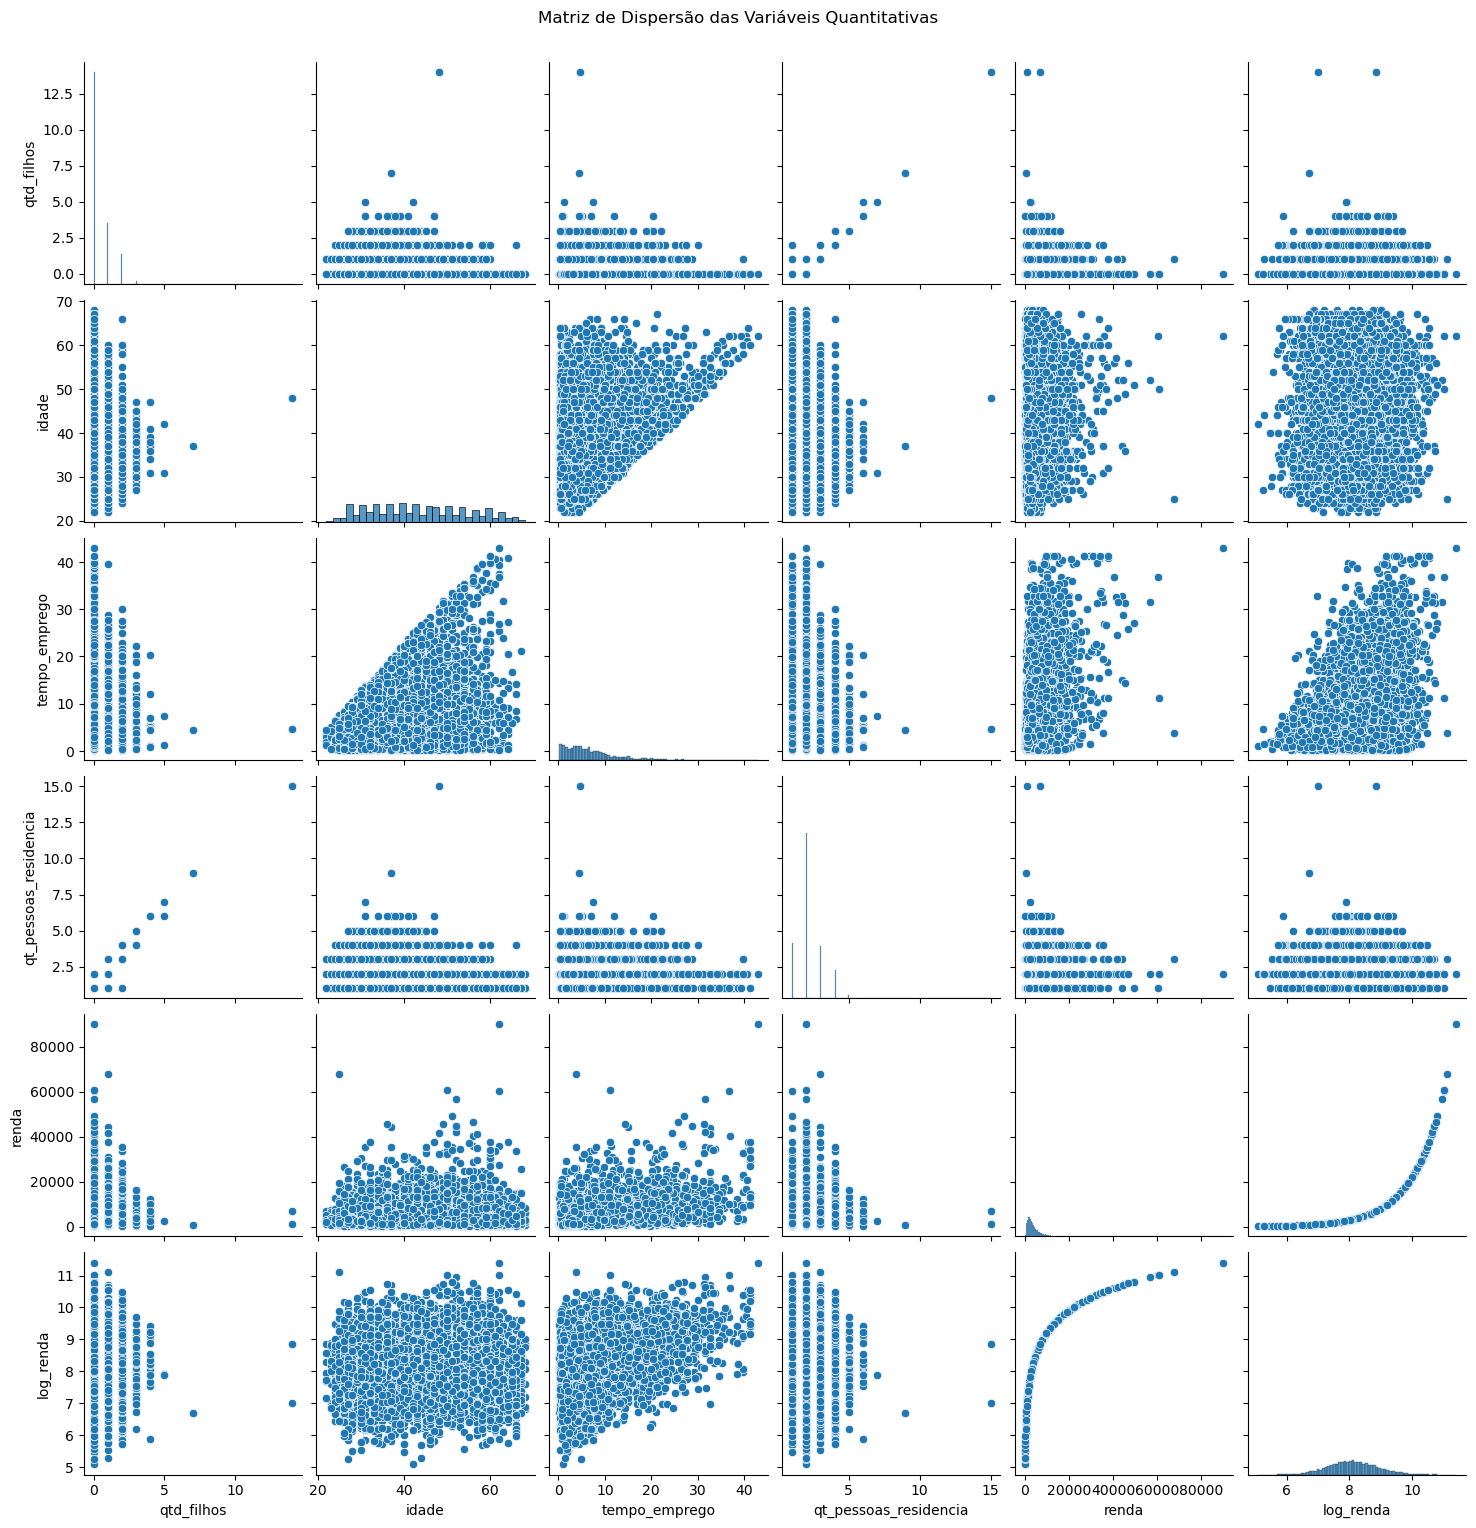

In [120]:
sns.pairplot(df_quantitativas)
plt.suptitle('Matriz de Dispersão das Variáveis Quantitativas', y=1.02)
plt.show()

In [50]:
correlacoes = df_quantitativas.corr()
correlacoes

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977
renda,0.009567,0.042570,0.394235,0.020977,1.000000


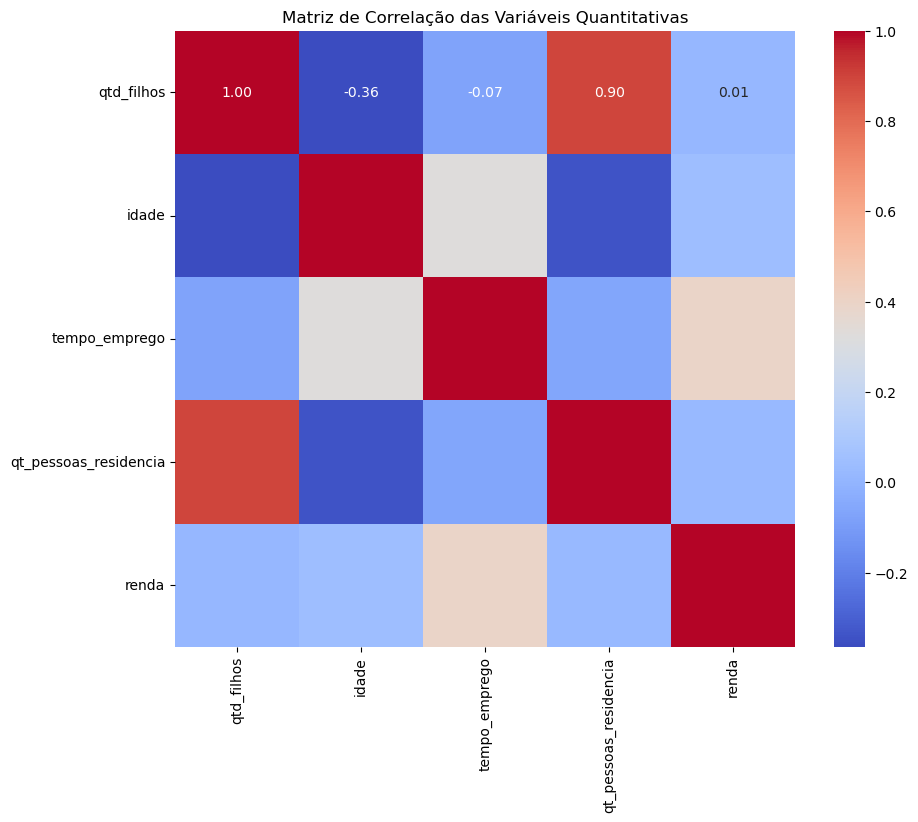

In [51]:
# Plotando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Quantitativas')
plt.show()

In [60]:
correlacoes_1 = df_quantitativas.corr()['renda'].sort_values(ascending=False).to_frame()
correlacoes_1.head()

,renda
renda,1.000000
tempo_emprego,0.394235
idade,0.042570
qt_pessoas_residencia,0.020977
qtd_filhos,0.009567


--> Pode-se notar que a correlação mais interessante é entre o tempo de emprego e a renda.

2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [70]:
mais_correlacoes = df_quantitativas.corr()

top_correlacoes = correlacoes['renda'].drop('renda').nlargest(2).to_frame()
top_correlacoes.head()

,renda
tempo_emprego,0.394235
idade,0.042570


In [71]:
var1, var2 = top_correlacoes.index

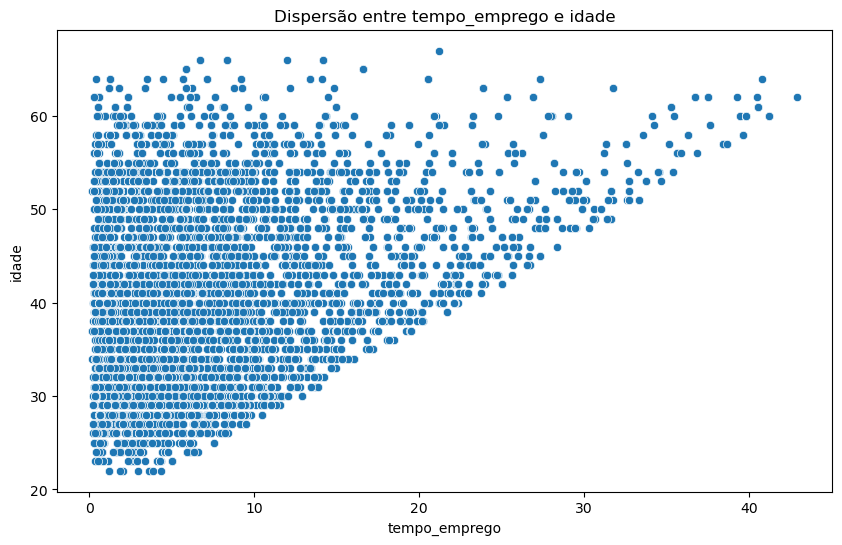

In [72]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=var1, y=var2)
plt.title(f'Dispersão entre {var1} e {var2}')
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

3) Na su aopinião, há outliers na variável renda?

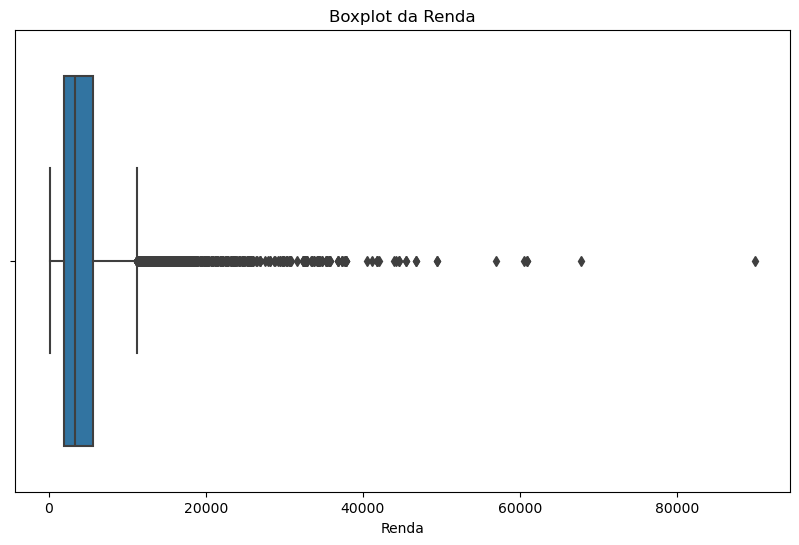

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_quantitativas['renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

Usando o gráfico do tipo Boxplot (um bom gráfico para identificar valores outliers) podemos observar que temos muitos valores fora do padrão de distribuição geral.

4) Calcule o logaritmo da variável renda e repita a sequência de análise

In [84]:
df_quantitativas['log_renda'] = np.log(df_quantitativas['renda'] + 1) 

df_quantitativas.head()


,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
0,1,36,3.575342,3.0,3369.24,8.122739
1,0,42,0.860274,2.0,6096.14,8.715575
2,2,31,8.065753,4.0,5658.98,8.641176
3,0,50,1.208219,2.0,7246.69,8.888438
4,0,52,13.873973,2.0,4017.37,8.298632


E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Users\Matheus Cerqueira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

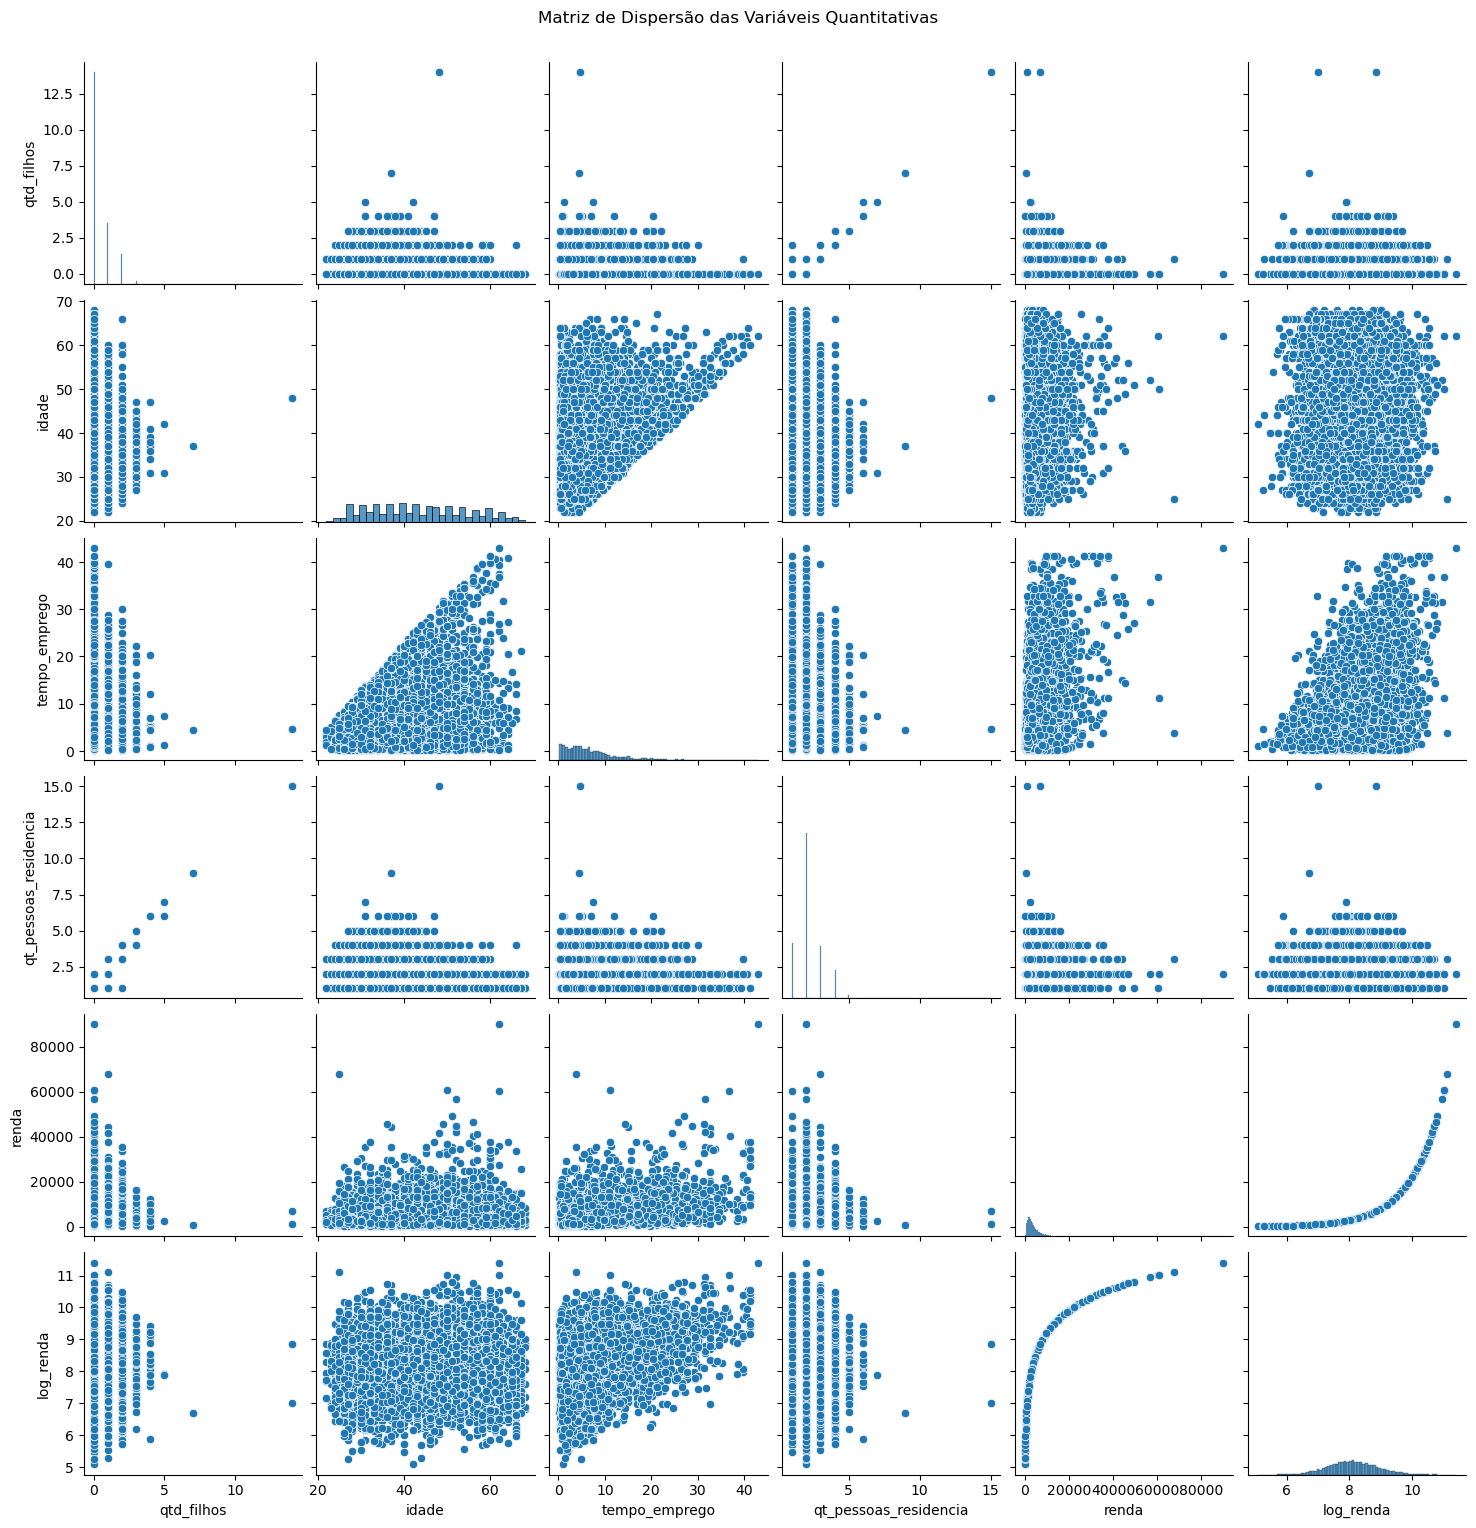

In [85]:
sns.pairplot(df_quantitativas)
plt.suptitle('Matriz de Dispersão das Variáveis Quantitativas', y=1.02)
plt.show()

In [86]:
correlacoes = df_quantitativas.corr()
correlacoes

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda,log_renda
qtd_filhos,1.000000,-0.364303,-0.074250,0.896488,0.009567,0.023741
idade,-0.364303,1.000000,0.323934,-0.338805,0.042570,0.024717
tempo_emprego,-0.074250,0.323934,1.000000,-0.065748,0.394235,0.379581
qt_pessoas_residencia,0.896488,-0.338805,-0.065748,1.000000,0.020977,0.036267
renda,0.009567,0.042570,0.394235,0.020977,1.000000,0.835823
log_renda,0.023741,0.024717,0.379581,0.036267,0.835823,1.000000


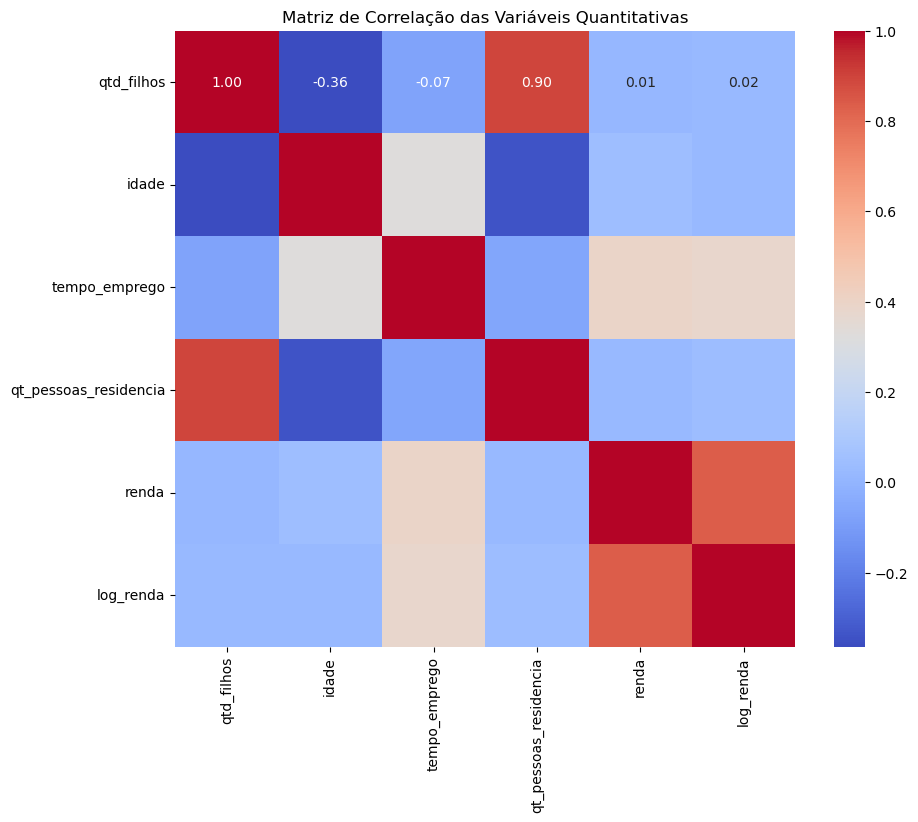

In [87]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlação das Variáveis Quantitativas')
plt.show()

In [88]:
correlacoes_log = df_quantitativas.corr()['log_renda'].sort_values(ascending=False).to_frame()
correlacoes_log.head()

,log_renda
log_renda,1.000000
renda,0.835823
tempo_emprego,0.379581
qt_pessoas_residencia,0.036267
idade,0.024717


In [125]:
mais_correlacoes_log = df_quantitativas.corr()

top_correlacoes_log = correlacoes['log_renda'].drop('log_renda').nlargest(2).to_frame()
top_correlacoes_log.head()

,log_renda
renda,0.835823
tempo_emprego,0.379581


In [126]:
var1, var2 = top_correlacoes_log.index

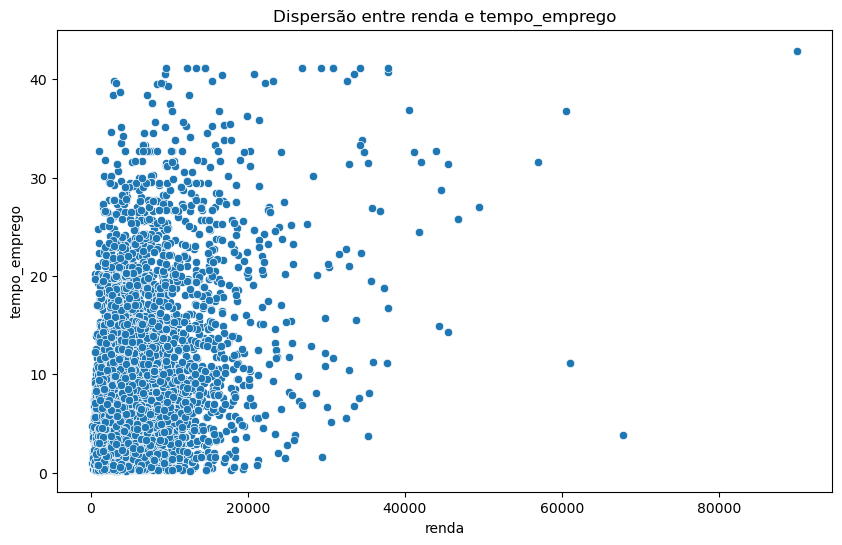

In [127]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=var3, y=var4)
plt.title(f'Dispersão entre {var3} e {var4}')
plt.xlabel(var1)
plt.ylabel(var2)
plt.show()

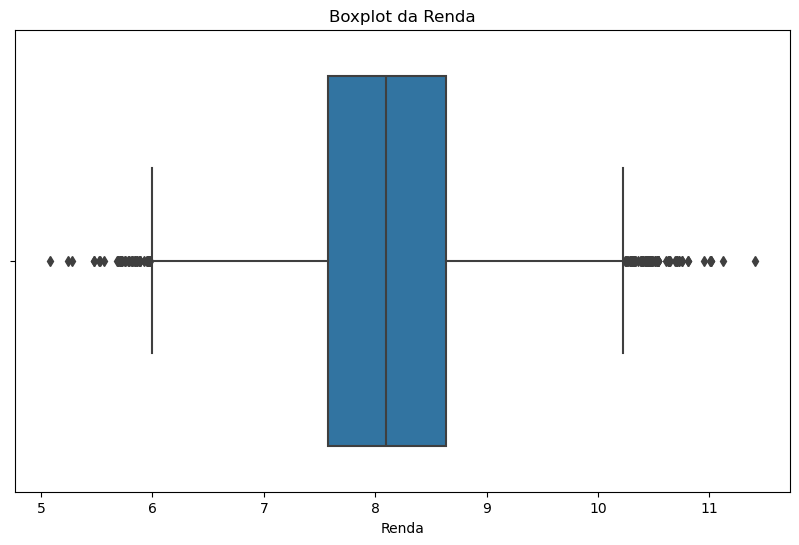

In [128]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_quantitativas['log_renda'])
plt.title('Boxplot da Renda')
plt.xlabel('Renda')
plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

In [ ]:
A aplicação do LOG para a renda gerou dados que mesmo assim não conseguimos chegar a nenhuma conclusão satisfatória.